# Machine Learning 2018
## Homework #1
### Natasha Mathur

#### This analysis was largely done on information from the year 2017 due to size constraints. 'American FactFinder' and the Census website were used to obtain information. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import datetime
import seaborn as sns
import requests
import json

# Problem 1

## Data Acquisition 

In [2]:
# Read in the csvs into dataframes
alley = pd.read_csv('311 Alley.csv')
graffiti = pd.read_csv('311 Graffiti.csv')
vacant = pd.read_csv('311 Vacant.csv')
vdf = vacant

In [3]:
# Modify 'vacant' dataframe to match columns in other dataframes
vacant.rename(columns={"SERVICE REQUEST TYPE": "Type of Service Request", \
                    "X COORDINATE": "X Coordinate", \
                    "Y COORDINATE": "Y Coordinate", \
                    "ZIP CODE": "ZIP Code", \
                    "SERVICE REQUEST NUMBER": "Service Request Number",\
                    "LATITUDE": "Latitude", "LONGITUDE": "Longitude", \
                    "DATE SERVICE REQUEST WAS RECEIVED": "Creation Date",\
                    }, inplace = True)
vacant["Street Address"] = vacant[vacant.columns[10:14]].apply(lambda x: ' '.join(x.astype(str)), axis = 1)

# Make a combined data frame with common columns
acols = set(alley.columns)
gcols = set(graffiti.columns)
vcols = set(vacant.columns)

common_cols = list(acols.intersection(vcols))

all = [alley, graffiti, vacant]
combined = pd.concat(all, ignore_index = True)
combined = combined[common_cols]
combined.shape
combined.columns

Index(['Community Area', 'Latitude', 'ZIP Code', 'Street Address',
       'Creation Date', 'Ward', 'Service Request Number', 'X Coordinate',
       'Longitude', 'Y Coordinate', 'Police District', 'Location',
       'Type of Service Request'],
      dtype='object')

## Data Analysis for Problem 3

In [92]:
using_property = vdf.groupby(['ANY PEOPLE USING PROPERTY? (HOMELESS, CHILDEN, GANGS)'])
using_property.size().to_frame()

0.4024777636594663

In [113]:
sdf = combined.loc[combined['Street Address'].isin(['3600 W ROOSEVELT RD'])]
roosevelt_df = combined.loc[combined['ZIP Code'].isin(['60624'])]
roosevelt_df.groupby(['Type of Service Request']).count()

,Location,Street Address,Y Coordinate,Police District,X Coordinate,Longitude,Service Request Number,Community Area,ZIP Code,Ward,Latitude,Creation Date
Type of Service Request,,,,,,,,,,,,
Alley Light Out,612,612,612,612,612,612,612,612,612,612,612,612
Graffiti Removal,310,311,311,311,311,310,311,311,311,311,310,311
Vacant/Abandoned Building,146,146,146,146,146,146,146,146,146,146,146,146


In [115]:
garfield_df = combined.loc[combined['ZIP Code'].isin(['60624', '60612'])]
garfield_df.groupby(['Type of Service Request']).count()

,Location,Street Address,Y Coordinate,Police District,X Coordinate,Longitude,Service Request Number,Community Area,ZIP Code,Ward,Latitude,Creation Date
Type of Service Request,,,,,,,,,,,,
Alley Light Out,953,953,953,953,953,953,953,953,953,953,953,953
Graffiti Removal,2260,2261,2261,2261,2261,2260,2261,2261,2261,2261,2260,2261
Vacant/Abandoned Building,198,198,198,198,198,198,198,198,198,198,198,198


In [117]:
uptown_df = combined.loc[combined['ZIP Code'].isin(['60613', '60640'])]
uptown_df.groupby(['Type of Service Request']).count()

,Location,Street Address,Y Coordinate,Police District,X Coordinate,Longitude,Service Request Number,Community Area,ZIP Code,Ward,Latitude,Creation Date
Type of Service Request,,,,,,,,,,,,
Alley Light Out,371,371,371,371,371,371,371,371,371,371,371,371
Graffiti Removal,5120,5120,5120,5120,5120,5120,5120,5120,5120,5120,5120,5120
Vacant/Abandoned Building,3,3,3,3,3,3,3,3,3,3,3,3


## Number of Calls by Ward

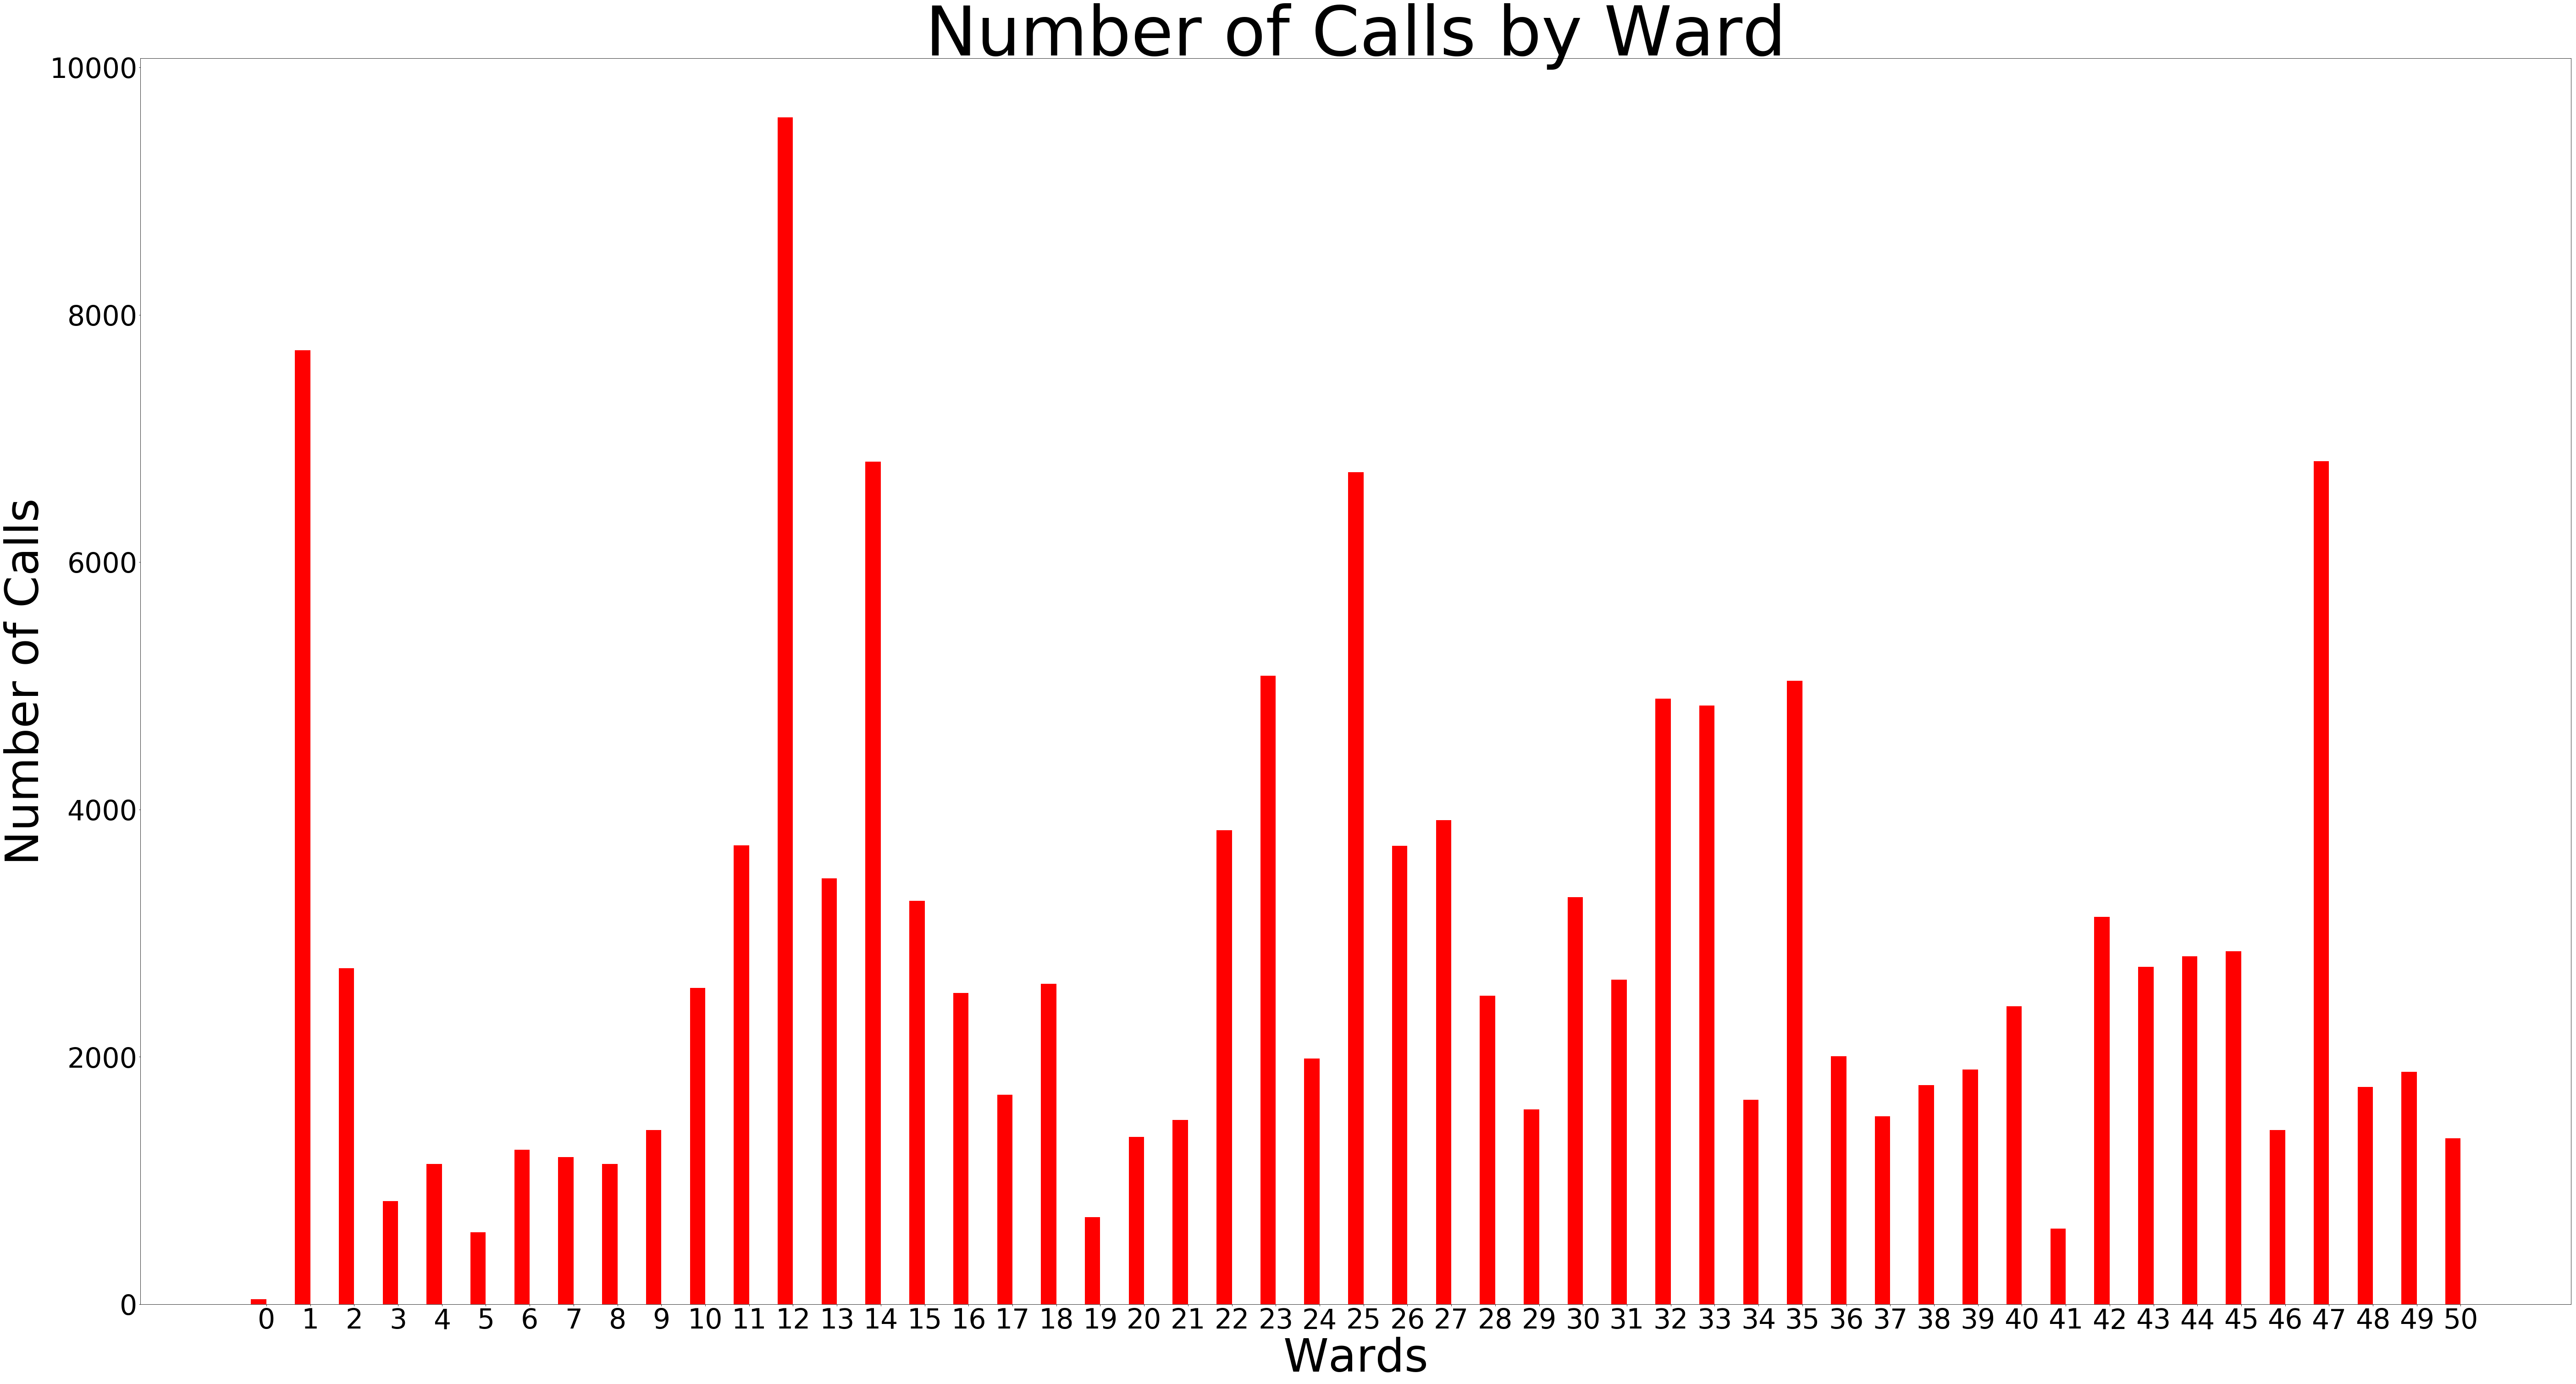

In [49]:
wards = combined.groupby('Ward')
y_vals = tuple(wards['Service Request Number'].count())
x_vals = range(0, 51)

N = 51
counts = y_vals

ind = np.arange(N)  # the x locations for the groups
width = 0.35

fig, ax = plt.subplots()
r = ax.bar(ind, y_vals, width, color='r')

# add some text for labels, title and axes ticks
ax.set_ylabel('Number of Calls', fontsize=100)
ax.set_xlabel('Wards',fontsize=100)
ax.set_title('Number of Calls by Ward',fontsize=150)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(x_vals)

rcParams['figure.figsize'] = 95, 50
plt.tick_params(labelsize=60)

plt.show()

# Alley - Specific Analysis

In [6]:
alley['Creation Date'] = pd.to_datetime(alley['Creation Date'])
alley['Completion Date'] = pd.to_datetime(alley['Completion Date'])
alley['Response Time'] = alley['Completion Date'] - alley['Creation Date']

In [7]:
alley['Response Time'].describe()

count                      24051
mean     33 days 11:44:45.742796
std      46 days 10:42:46.210381
min              0 days 00:00:00
25%              2 days 00:00:00
50%             14 days 00:00:00
75%             48 days 00:00:00
max            403 days 00:00:00
Name: Response Time, dtype: object

## The average response time for an alley light related complaint was 33 days. 

In [27]:
copied = combined
copied.index = copied['Creation Date']
y_val = tuple(copied.groupby(by=[copied.index.month]).count()['Creation Date'])

AttributeError: 'Index' object has no attribute 'month'

In [11]:
N = 12
x_vals = range(1,13)
x_vals = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

ind = np.arange(N)  # the x locations for the groups
width = 0.35

fig, ax = plt.subplots()
r = ax.bar(ind, creation, width, color='lightblue')

# add some text for labels, title and axes ticks
ax.set_ylabel('Number of Calls', fontsize=100)
ax.set_xlabel('Months',fontsize=100)
ax.set_title('Number of Alley Light Calls by Month',fontsize=150)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(x_vals)

rcParams['figure.figsize'] = 95, 50
plt.tick_params(labelsize=60)

plt.show()

NameError: name 'creation' is not defined

## Combined Data Analysis

In [13]:
combined.groupby(['Type of Service Request']).describe()

Community Area                                   \
                                   count       mean        std  min   25%   
Type of Service Request                                                     
Alley Light Out                  27887.0  41.330584  22.141763  0.0  22.0   
Graffiti Removal                112769.0  31.202653  21.255266  0.0  16.0   
Vacant/Abandoned Building         3662.0  51.458766  17.156997  0.0  42.0   

                                             Latitude              ...     \
                            50%   75%   max     count       mean   ...      
Type of Service Request                                            ...      
Alley Light Out            44.0  63.0  77.0   27885.0  41.831482   ...      
Graffiti Removal           24.0  57.0  77.0  112699.0  41.884429   ...      
Vacant/Abandoned Building  52.0  67.0  77.0    3665.0  41.778036   ...      

                           Y Coordinate               ZIP Code                \
                                    75%          max     count          mean   
Type of Service Request                                                        
Alley Light Out            1.912651e+06  1951491.110   27865.0  60623.200108   
Graffiti Removal           1.921072e+06  1951398.978  112740.0  60616.893756   
Vacant/Abandoned Building  1.871576e+06  1950041.394    3636.0  60611.652640   

                                                                        \
                                   std  min      25%      50%      75%   
Type of Service Request                                                  
Alley Light Out             726.567711  0.0  60620.0  60630.0  60641.0   
Graffiti Removal            807.590412  0.0  60614.0  60625.0  60639.0   
Vacant/Abandoned Building  1005.597611  0.0  60619.0  60624.0  60636.0   

                                    
                               max  
Type of Service Request             
Alley Light Out            60827.0  
Graffiti Removal           60827.0  
Vacant/Abandoned Building  60827.0  

[3 rows x 64 columns]

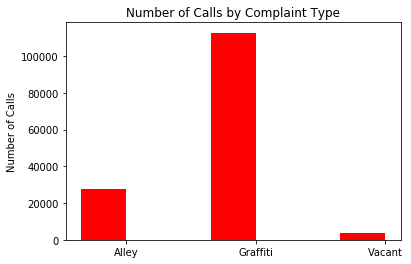

In [11]:
N = 3
counts = (27887, 112769, 3662)


ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, counts, width, color='r')

# add some text for labels, title and axes ticks
ax.set_ylabel('Number of Calls')
ax.set_title('Number of Calls by Complaint Type')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Alley', 'Graffiti', 'Vacant'))

plt.show()

In [24]:
all_complaints = combined.groupby(['Type of Service Request'])
all_complaints.size().to_frame()

,0
Type of Service Request,
Alley Light Out,27896
Graffiti Removal,112779
Vacant/Abandoned Building,3666


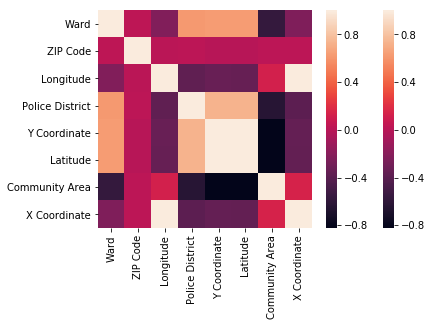

In [22]:
corr = combined.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)
plt.show()

# Problem 2

In [113]:
from census import Census
from us import states

In [68]:
# Function to process a dataframe of longitudes and latitudes 
# and connect it to FIPS and American FactFinder data. 

race = 'B02001_003E'

def process(df):
    url1 = "https://geo.fcc.gov/api/census/block/find?latitude="
    url3 = "&longitude="
    url5 = "&showall=false&format=json"
    for row in df.iterrows():
        url_lat = str(row[1]['Latitude'])
        url_long = str(row[1]['Longitude'])
        url = url1 + url_lat + url3 + url_long + url5
        r = requests.get(url).json()
        FIPS = r['Block']['FIPS']
        county = FIPS[2:5]
        tract = FIPS[5:11]
        block = FIPS[11]
        
        race = 'B02001_003E'
        
        acs_url_1 = 'https://api.census.gov/data/2016/acs/acs5?get=NAME,'
        acs_url_2 = '{}&for=block%20group:{}&in=state:17%20county:{}%20tract:{}&key=057067ab3c89ff8d3a7a8dc08534ca151bb76bb2'.format(race_key, block, county, tract)
        acs_url = acs_url_1 + race + acs_url_2
        
        acs_data = requests.get(acs_url).json()
        
        if int(acs_data[1][1]) == 0:
            race.append(0)
        else:
            race.append(int(acs_data[1][2]) / int(acs_data[1][1]))

process(combined)


170317206001024
https://api.census.gov/data/2016/acs/acs5?get=NAME&for=block%20group:1&in=state:17%20county:031%20tract:720600&key=057067ab3c89ff8d3a7a8dc08534ca151bb76bb2
[['NAME', 'state', 'county', 'tract', 'block group'], ['Block Group 1, Census Tract 7206, Cook County, Illinois', '17', '031', '720600', '1']]


In [73]:
block = '1'
county = '720600'
tract = '031'

race = 'B02001_003E'
acs_url_1 = 'https://api.census.gov/data/2016/acs/acs5?get=NAME,'
acs_url_2 = '&for=block%20group:1&in=state:17%20county:031%20tract:720600&key=057067ab3c89ff8d3a7a8dc08534ca151bb76bb2'
acs_url = acs_url_1 + race +  acs_url_2
print(acs_url)


https://api.census.gov/data/2016/acs/acs5?get=NAME,B02001_003E&for=block%20group:1&in=state:17%20county:031%20tract:720600&key=057067ab3c89ff8d3a7a8dc08534ca151bb76bb2


In [116]:
c = Census("4e30b193a1f5eca9ecee8af6534c42ce95d95033")
c.sf1.state_county_tract('NAME', states.IL.fips, '031', Census.ALL)

[{'NAME': 'Census Tract 101',
  'county': '031',
  'state': '17',
  'tract': '010100'},
 {'NAME': 'Census Tract 102.01',
  'county': '031',
  'state': '17',
  'tract': '010201'},
 {'NAME': 'Census Tract 102.02',
  'county': '031',
  'state': '17',
  'tract': '010202'},
 {'NAME': 'Census Tract 103',
  'county': '031',
  'state': '17',
  'tract': '010300'},
 {'NAME': 'Census Tract 104',
  'county': '031',
  'state': '17',
  'tract': '010400'},
 {'NAME': 'Census Tract 105.01',
  'county': '031',
  'state': '17',
  'tract': '010501'},
 {'NAME': 'Census Tract 105.02',
  'county': '031',
  'state': '17',
  'tract': '010502'},
 {'NAME': 'Census Tract 105.03',
  'county': '031',
  'state': '17',
  'tract': '010503'},
 {'NAME': 'Census Tract 106',
  'county': '031',
  'state': '17',
  'tract': '010600'},
 {'NAME': 'Census Tract 107.01',
  'county': '031',
  'state': '17',
  'tract': '010701'},
 {'NAME': 'Census Tract 107.02',
  'county': '031',
  'state': '17',
  'tract': '010702'},
 {'NAME': '

In [4]:
combo_copy = combined

race_df = pd.read_csv('ACS_16_race.csv')
female_df = pd.read_csv('ACS_16_female.csv')
female_df.columns = ['ZIP Code', 'Female Population']
race_df.columns = ['ZIP Code', 'White Population']
married_df = pd.read_csv('ACS Married.csv')
language_df = pd.read_csv('ACS languages.csv')
language_df = language_df[['ZIP Code', 'Percent; Estimate; Speak a language other than English']]
language_df.columns = ['ZIP Code', 'Non-Native English Speakers']
combo_copy.columns

Index(['Community Area', 'Latitude', 'ZIP Code', 'Street Address',
       'Creation Date', 'Ward', 'Service Request Number', 'X Coordinate',
       'Longitude', 'Y Coordinate', 'Police District', 'Location',
       'Type of Service Request'],
      dtype='object')

In [5]:
combo_copy = combo_copy.merge(race_df, on = 'ZIP Code')
combo_copy = combo_copy[['Type of Service Request', 'ZIP Code', 'Location','Latitude',
                         'Longitude', 'Ward', 'White Population']]
combo_copy = combo_copy.merge(married_df, on = 'ZIP Code')
combo_copy = combo_copy.merge(language_df, on = 'ZIP Code')
combo_copy = combo_copy.merge(female_df, on = 'ZIP Code')
combo_copy.columns


Index(['Type of Service Request', 'ZIP Code', 'Location', 'Latitude',
       'Longitude', 'Ward', 'White Population', 'Percent Married',
       'Non-Native English Speakers', 'Female Population'],
      dtype='object')

In [6]:
no_eng = combo_copy[['Type of Service Request', 'Non-Native English Speakers']]
no_eng['Non-Native English Speakers'] = pd.to_numeric(no_eng['Non-Native English Speakers'], errors='coerce')
nec = no_eng.groupby(['Type of Service Request'])
nec.mean()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Non-Native English Speakers
Type of Service Request,
Alley Light Out,36.140989
Graffiti Removal,47.459948
Vacant/Abandoned Building,18.415021


In [26]:
m = combo_copy[['Type of Service Request', 'Percent Married']]
m['Percent Married'] = pd.to_numeric(m['Percent Married'], errors='coerce')
mc = m.groupby(['Type of Service Request'])
mc.mean()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Percent Married
Type of Service Request,
Alley Light Out,34.361064
Graffiti Removal,36.815168
Vacant/Abandoned Building,25.544429


In [7]:
white = combo_copy[['Type of Service Request', 'White Population']]
white_complaints = white.groupby(['Type of Service Request'])
white_complaints.mean()

,White Population
Type of Service Request,
Alley Light Out,27352.502459
Graffiti Removal,42131.204030
Vacant/Abandoned Building,11837.202201


In [100]:
fc = combo_copy[['Type of Service Request', 'Female Population']]
fc = fc.groupby(['Type of Service Request'])
fc.mean()

,Female Population
Type of Service Request,
Alley Light Out,34438.850939
Graffiti Removal,35888.621245
Vacant/Abandoned Building,31496.480880
